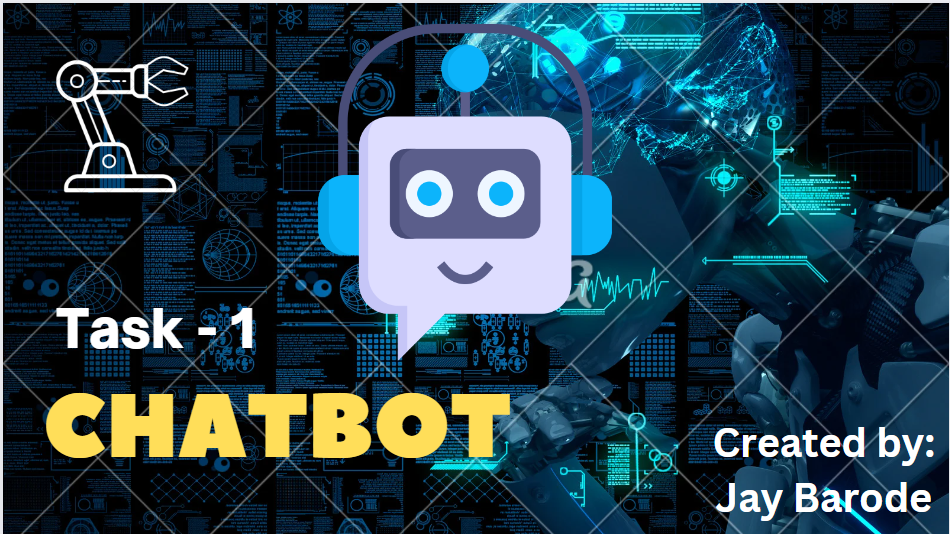

Importing the dependencies

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model


Json file of ques. and response

In [18]:
%%writefile content.json
{
    "intents": [

        {
            "tag": "google",
            "patterns": [
                "google",
                "search",
                "internet"
            ],
            "responses": [
                "Redirecting to Google..."
            ]
        },
        {
            "tag": "greeting",
            "patterns": [
                "Hi there",
                "How are you",
                "Is anyone there?",
                "Hey",
                "Hola",
                "Hello",
                "Good day",
                "Namaste",
                "yo"
            ],
            "responses": [
                "Hello",
                "Good to see you again",
                "Hi there, how can I help?"
            ],
            "context": [
                ""
            ]
        },
        {
            "tag": "goodbye",
            "patterns": [
                "Bye",
                "See you later",
                "Goodbye",
                "Get lost",
                "Till next time",
                "bbye"
            ],
            "responses": [
                "See you!",
                "Have a nice day",
                "Bye! Come back again soon."
            ],
            "context": [
                ""
            ]
        },
        {
            "tag": "thanks",
            "patterns": [
                "Thanks",
                "Thank you",
                "That's helpful",
                "Awesome, thanks",
                "Thanks for helping me"
            ],
            "responses": [
                "Happy to help!",
                "Any time!",
                "My pleasure"
            ],
            "context": [
                ""
            ]
        },
        {
            "tag": "noanswer",
            "patterns": [],
            "responses": [
                "Sorry, can't understand you",
                "Please give me more info",
                "Not sure I understand"
            ],
            "context": [
                ""
            ]
        },
        {
            "tag": "options",
            "patterns": [
                "How you could help me?",
                "What you can do?",
                "What help you provide?",
                "How you can be helpful?",
                "What support is offered"
            ],
            "responses": [
                "I am a general purpose chatbot. My capabilities are : \n 1. I can chat with you. Try asking me for jokes or riddles! \n 2. Ask me the date and time \n 3. I can google search for you. Use format google: your query \n 4. I can get the present weather for any city. Use format weather: city name \n 5. I can get you the top 10 trending news in India. Use keywords 'Latest News' \n 6. I can get you the top 10 trending songs globally. Type 'songs' \n 7. I can set a timer for you. Enter 'set a timer: minutes to timer' \n 8. I can get the present Covid stats for any country. Use 'covid 19: world' or 'covid 19: country name' \n For suggestions to help me improve, send an email to ted.thedlbot.suggestions@gmail.com . Thank you!! "
            ],
            "context": [
                ""
            ]
        },
        
        {
            "tag": "jokes",
            "patterns": [
                "Tell me a joke",
                "Joke",
                "Make me laugh"
            ],
            "responses": [
                "A perfectionist walked into a bar...apparently, the bar wasn't set high enough",
                "I ate a clock yesterday, it was very time-consuming",
                "Never criticize someone until you've walked a mile in their shoes. That way, when you criticize them, they won't be able to hear you from that far away. Plus, you'll have their shoes.",
                "The world tongue-twister champion just got arrested. I hear they're gonna give him a really tough sentence.",
                "I own the world's worst thesaurus. Not only is it awful, it's awful.",
                "What did the traffic light say to the car? \"Don't look now, I'm changing.\"",
                "What do you call a snowman with a suntan? A puddle.",
                "How does a penguin build a house? Igloos it together",
                "I went to see the doctor about my short-term memory problems – the first thing he did was make me pay in advance",
                "As I get older and I remember all the people I’ve lost along the way, I think to myself, maybe a career as a tour guide wasn’t for me.",
                "o what if I don't know what 'Armageddon' means? It's not the end of the world."
            ],
            "context": [
                "jokes"
            ]
        },
        {
            "tag": "Identity",
            "patterns": [
                "Who are you",
                "what are you"
            ],
            "responses": [
                "I am Code Duzoo, a Deep-Learning chatbot"
            ]
        },
        {
            "tag": "datetime",
            "patterns": [
                "What is the time",
                "what is the date",
                "date",
                "time",
                "tell me the date","day","what day is is today"
            ],
            "responses": [
                "Date and Time"
            ]
        },
        {
            "tag": "whatsup",
            "patterns": [
                "Whats up",
                "Wazzup",
                "How are you",
                "sup","How you doing"
            ],
            "responses": [
                "All good..What about you?"
            ]
        },
        {
            "tag": "haha",
            "patterns": [
                "haha",
                "lol",
                "rofl",
                "lmao",
                "thats funny"
            ],
            "responses": [
                "Glad I could make you laugh !"
            ]
        },
        {
            "tag": "programmer",
            "patterns": [
                "Who made you",
                "who designed you",
                "who programmed you",
                "who created you",
                "who developed you"
            ],
            "responses": [
                "I was made by Jay Barode."
            ]
        },
        {
            "tag": "insult",
            "patterns": [
                
                "you are dumb",
                
                "shut up",
                "idiot"
            ],
            "responses": [
                "Well that hurts :("
            ]
        },
        {
            "tag": "activity",
            "patterns": [
                "what are you doing",
                "what are you upto"
            ],
            "responses": [
                "Talking to you, of course!"
            ]
        },
        {
            "tag": "exclaim",
            "patterns": [
                "Awesome",
                "Great",
                "I know",
                "ok",
                "yeah"
            ],
            "responses": [
                "Yeah!"
            ]
        },
        
        {
            "tag": "weather",
            "patterns": [
                "temperature",
                "weather",
                "how hot is it"
            ],
            "responses": [
                "..."
            ]
        },
        {
            "tag": "jay",
            "patterns": [
                "who is he",
                "who is that",
                "who is jay",
                "jay barode"
            ],
            "responses": [
                "Head over to his any of his social profiles to find out! Linkedin: https://www.linkedin.com/in/jaybarode728/ Github: https://github.com/learnerjay784"
            ]
        },
        {
            "tag": "contact",
            "patterns": [
                "contact developer",
                "contact jay",
                "contact programmer",
                "contact creator"
            ],
            "responses": [
                "You can contact my creator at his Linkedin profile : https://www.linkedin.com/in/jaybarode728/"
            ]
        },
        {
            "tag": "appreciate",
            "patterns": [
                "You are awesome",
                "you are the best",
                "you are great",
                "you are good"
            ],
            "responses": [
                "Thanks a lot!"
            ]
        },
        {
            "tag": "nicetty",
            "patterns": [
                "it was nice talking to you",
                "good talk"
            ],
            "responses": [
                "It was nice talking to you as well! Come back soon!"
            ]
        },
        {
            "tag": "no",
            "patterns": [
                "no",
                "nope"
            ],
            "responses": [
                "ok"
            ]
        },
        {
            "tag": "news",
            "patterns": [
                "news",
                "latest news",
                "india news"
            ],
            "responses": [
                "..."
            ]
        },
        {
            "tag": "inspire",
            "patterns": [
                "who inspires you",
                "who is your inspiration",
                "who motivates you"
            ],
            "responses": [
                "Personally, I find Dr. APJ Abdul Kalam and Ratan Tata very inspiring.."
            ]
        },
        {
            "tag": "cricket",
            "patterns": [
                "current cricket matches",
                "cricket score"
            ],
            "responses": [
                "..."
            ]
        },
        {
            "tag": "song",
            "patterns": [
                "top songs",
                "best songs",
                "hot songs",
                " top 10 songs",
                "top ten songs"
            ],
            "responses": [
                "..."
            ]
        },
        {
            "tag": "greetreply",
            "patterns": [
                "i am good",
                "I'm good",
                "i am fine",
                " i'm fine","good"
            ],
            "responses": [
                "Good to know!"
            ]
        },
        {
            "tag": "timer",
            "patterns": [
                "set a timer"
            ],
            "responses": [
                "..."
            ]
        },
        {
            "tag": "covid19",
            "patterns": [
                "covid 19 "
            ],
            "responses": [
                "..."
            ]
        },
        {
            "tag": "suggest",
            "patterns": [
                "you are useless","useless","suggest","suggestions","you are bad"
            ],
            "responses": [
                "Please mail your suggestions to barodejay468@gmail.com. Thank you for helping me improve!"
            ]
        },
            {"tag": "riddle",
            "patterns": [
                "Ask me a riddle",
                "Ask me a question",
                "Riddle"
            ],
            "responses": [
                "What two things can you never eat for breakfast?.....Lunch and Dinner!",
                "What word is spelled incorrectly in every single dictionary?.....Incorrectly",
                " How can a girl go 25 days without sleep?.....She sleeps and night!",
                "How do you make the number one disappear?.....Add the letter G and it’s 'gone'!",
                " What will you actually find at the end of every rainbow?.....The letter 'w'",
                "What can be caught but never thrown?.....A cold!",
                "What has a thumb and four fingers but is not actually alive?.....Your Gloves!",
                " What 5-letter word becomes shorter when you add two letters to it?.....Short",
                "Why can't a bike stand on it's own?.....It is two-tired."
            ],
            "context": [
                "riddles"
            ]
        },
        {
            "tag": "age",
            "patterns": [
                "how old are you","when were you made","what is your age"
            ],
            "responses": [
                "I was made in 2023, if that's what you are asking!"
            ]
        }
    ]
}

Overwriting content.json


Importing the data

In [19]:
with open('content.json') as content:
  data1 = json.load(content)

In [20]:
#Get all the data into list
tags = []
inputs = []
responses = {}
for intent in data1['intents']:
  responses[intent['tag']] = intent['responses']
  for lines in intent['patterns']:
    inputs.append(lines)
    tags.append(intent['tag'])

In [21]:
#converting to dataframe
data = pd.DataFrame({"inputs":inputs,
                     "tags":tags})

In [22]:
#print the data
print(data)

                 inputs      tags
0                google    google
1                search    google
2              internet    google
3              Hi there  greeting
4           How are you  greeting
..                  ...       ...
110   Ask me a question    riddle
111              Riddle    riddle
112     how old are you       age
113  when were you made       age
114    what is your age       age

[115 rows x 2 columns]


In [23]:
data = data.sample(frac = 1)

# Data Preprocessing 
Such as Removing the punctuations, converting to lowercase, encoding the texual data to numerical data etc.

In [24]:
#removing punctuations
import string
data['inputs'] = data['inputs'].apply(lambda word:[ltrs.lower() for ltrs in word if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda word: ''.join(word))
data

,inputs,tags
111,riddle,riddle
56,shut up,insult
8,hello,greeting
18,thanks,thanks
68,who is he,jay
...,...,...
77,you are the best,appreciate
57,idiot,insult
70,who is jay,jay
38,day,datetime


In [25]:
#Tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = 2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])

#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train  = pad_sequences(train)

#encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [26]:
input_shape = x_train.shape[1]
print(input_shape)

6


In [27]:
#define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words :",vocabulary)
output_length = le.classes_.shape[0]
print("Output Length: ",output_length)

number of unique words : 130
Output Length:  30


Neural Network
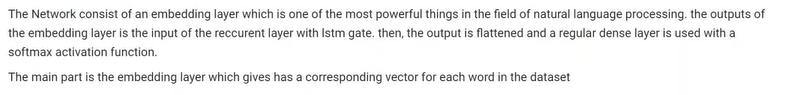

In [28]:
#creating the model

i = Input(shape = (input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10,return_sequences = True)(x)
x = Flatten()(x)
x = Dense(output_length,activation = "softmax")(x)
model = Model(i,x)


In [29]:
#Compiling the model
model.compile(loss = "sparse_categorical_crossentropy",optimizer ='adam',metrics =['accuracy'])


Training the model

In [30]:
train = model.fit(x_train,y_train,epochs = 200)

Epoch 1/200
4/4 [==============================] - 2s 7ms/step - loss: 3.4017 - accuracy: 0.0087
Epoch 2/200
4/4 [==============================] - 0s 10ms/step - loss: 3.3986 - accuracy: 0.0087
Epoch 3/200
4/4 [==============================] - 0s 7ms/step - loss: 3.3962 - accuracy: 0.0609
Epoch 4/200
4/4 [==============================] - 0s 8ms/step - loss: 3.3938 - accuracy: 0.0870
Epoch 5/200
4/4 [==============================] - 0s 7ms/step - loss: 3.3909 - accuracy: 0.1217
Epoch 6/200
4/4 [==============================] - 0s 7ms/step - loss: 3.3879 - accuracy: 0.1304
Epoch 7/200
4/4 [==============================] - 0s 7ms/step - loss: 3.3850 - accuracy: 0.1565
Epoch 8/200
4/4 [==============================] - 0s 7ms/step - loss: 3.3816 - accuracy: 0.1391
Epoch 9/200
4/4 [==============================] - 0s 8ms/step - loss: 3.3777 - accuracy: 0.1304
Epoch 10/200
4/4 [==============================] - 0s 7ms/step - loss: 3.3733 - accuracy: 0.1304
Epoch 11/200
4/4 [==========

Model Analysis

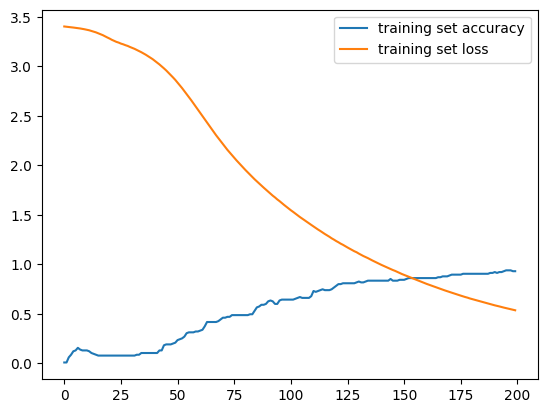

In [31]:
#plotting model accuracy
plt.plot(train.history['accuracy'],label = 'training set accuracy')
plt.plot(train.history['loss'],label = 'training set loss')
plt.legend()

**Testing**

I've also tested the model in a way to mimic a human interacting with a bot and got positive results.However,This was very simple because of the tiny amount of data I have created.But the same model can also be used with large amount of data.

In [33]:
#chatting
import random

while True:
  texts_p = []
  prediction_input = input('You : ')

  #removing punctuations and converting to lowercase
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  #tokenization and padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  #getting output from the model
  output = model.predict(prediction_input)
  output = output.argmax()

  #Finding the right tag and prediction
  response_tag = le.inverse_transform([output])[0]
  print("Code Duzoo : ",random.choice(responses[response_tag]))
  if response_tag == "goodbye":
    break

You : hello
1/1 [==============================] - 0s 25ms/step
Code Duzoo :  Hello
You : who are you
1/1 [==============================] - 0s 31ms/step
Code Duzoo :  I am Code Duzoo, a Deep-Learning chatbot
You : what can you do
1/1 [==============================] - 0s 23ms/step
Code Duzoo :  I am a general purpose chatbot. My capabilities are : 
 1. I can chat with you. Try asking me for jokes or riddles! 
 2. Ask me the date and time 
 3. I can google search for you. Use format google: your query 
 4. I can get the present weather for any city. Use format weather: city name 
 5. I can get you the top 10 trending news in India. Use keywords 'Latest News' 
 6. I can get you the top 10 trending songs globally. Type 'songs' 
 7. I can set a timer for you. Enter 'set a timer: minutes to timer' 
 8. I can get the present Covid stats for any country. Use 'covid 19: world' or 'covid 19: country name' 
 For suggestions to help me improve, send an email to ted.thedlbot.suggestions@gmail.com